#YOLO

**Object Detection**

An object in computer vision is anything that has a well-defined shape or boundary and can be identified in an image. For example: cars, people, fish, chairs, etc.

Object detection is the task of finding objects in an image and labeling them.

It answers two questions:

*1. Where is the object? (Bounding box)*

*2. What is the object? (Class label)*

For example, in a photo of an aquarium, detection might say:

Fish at coordinates (x=50, y=30, width=100, height=40)

**Types of Object-detection**

**A. Two-stage Detectors**

How it works:

Stage 1: Generate region proposals (where objects might be).

Stage 2: Classify these proposals and refine the bounding boxes.

Pros: High accuracy

Cons: Slower, not suitable for real-time applications

**B. One-stage Detectors**


How it works: Predict bounding boxes and class probabilities directly from the image.

Pros: Very fast, suitable for real-time tasks

Cons: Slightly lower accuracy than two-stage detectors (although YOLOv8 is closing the gap)

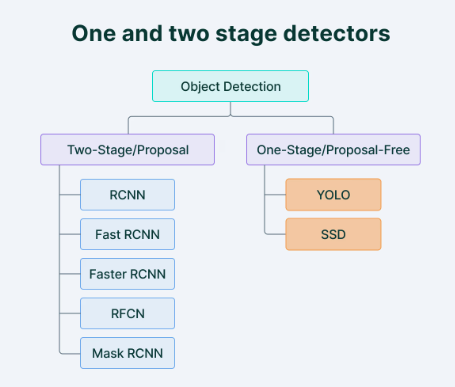

**What is YOLO ?**

YOLO = You Only Look Once
Instead of looking at regions separately, YOLO divides the image into a grid and predicts bounding boxes and classes for each grid cell in one pass.

Image → grid → boxes → labels → metrics

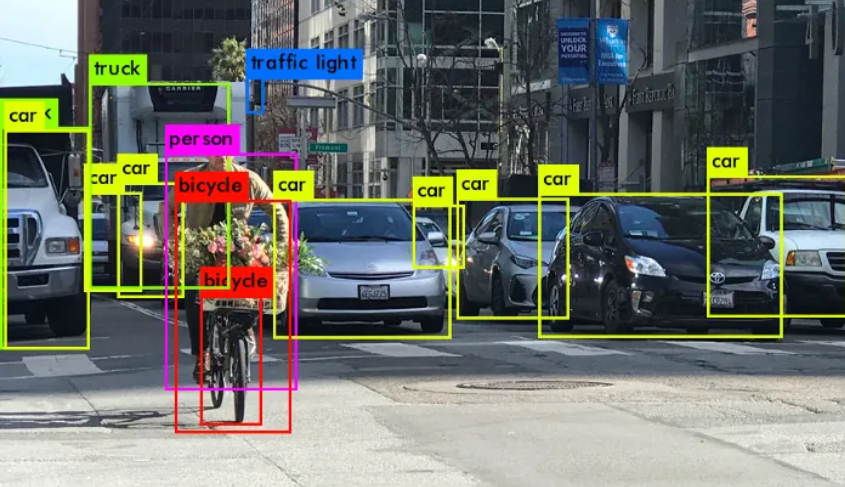

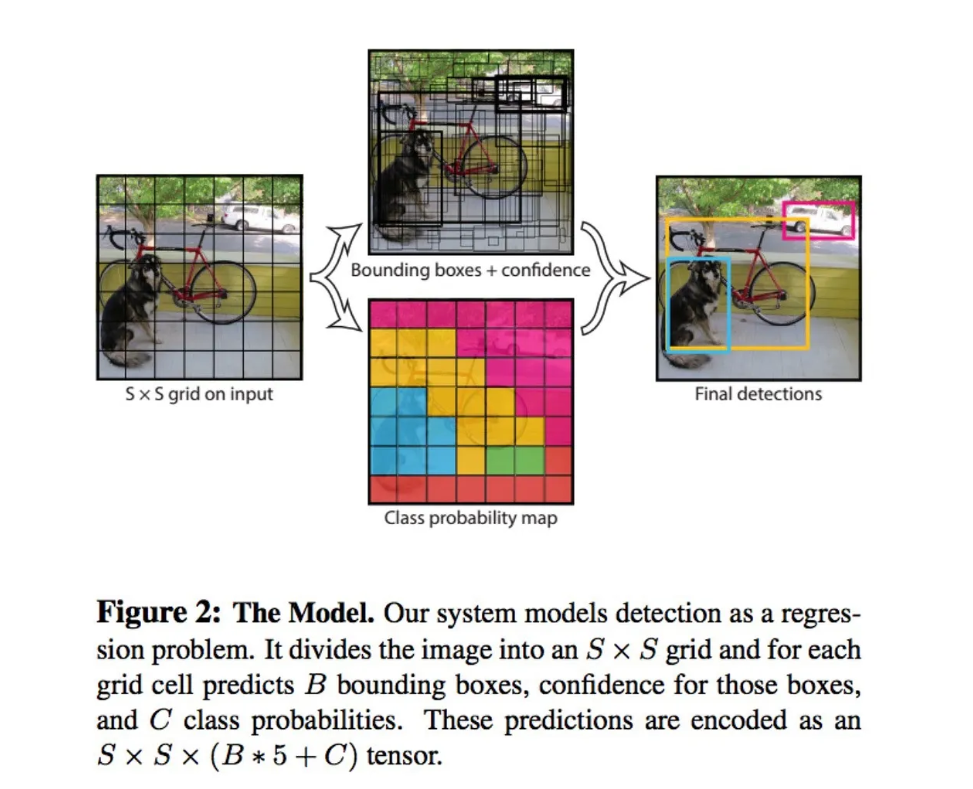

**Evolution of YOLO**

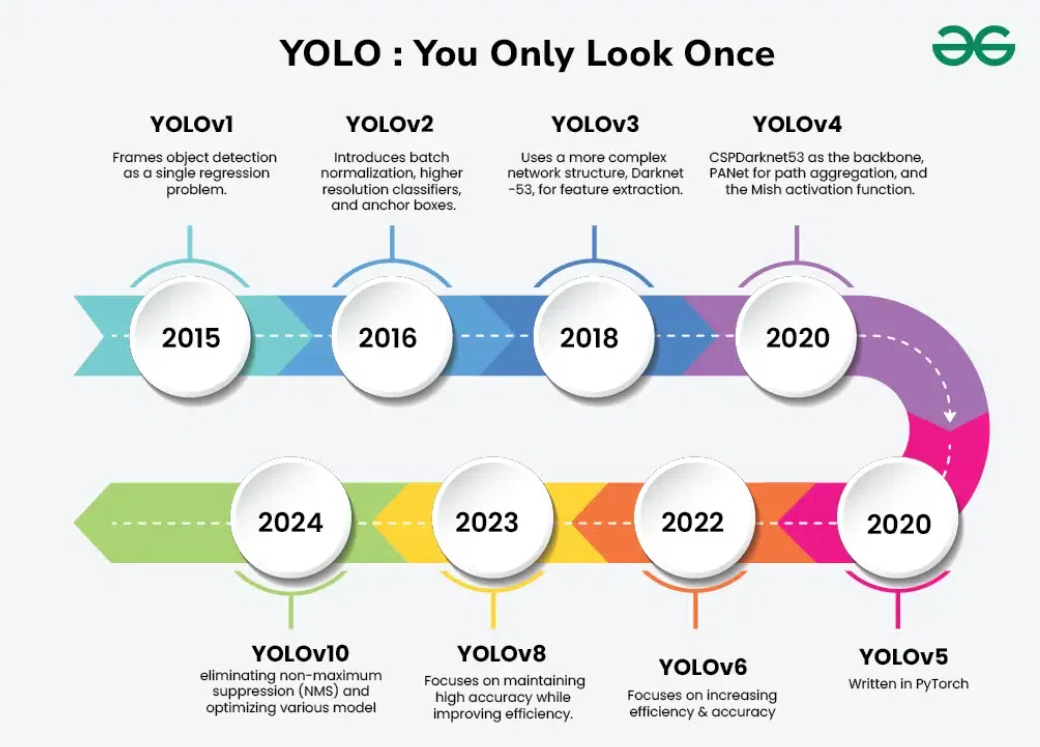

**Fish Detection using YOLOv8**

**What is Roboflow?**

Roboflow is a platform for computer vision projects that helps you prepare, label, and manage image datasets for training models like YOLO.

In simple terms, it lets you:

1. Label data – mark objects in images and give them a category (like “fish” or “cat”).

2. Organize datasets – split into training, validation, and test sets.

3. Augment images – create variations (flip, rotate, change brightness) to improve model performance.

4. Export data – in formats ready to train machine learning models.

**Step 1: Sign up for Roboflow**

1. Go to https://roboflow.com/

2. Click Sign Up and create a free account.

**Step 2: Name your dataset and choose a plan**

1. In the Roboflow interface, you’ll see a form like this:


*   Dataset Name: Give it a descriptive name, e.g., fish_detection

*   Plan: Select Public (this is free and enough to start)

2. Click Continue.

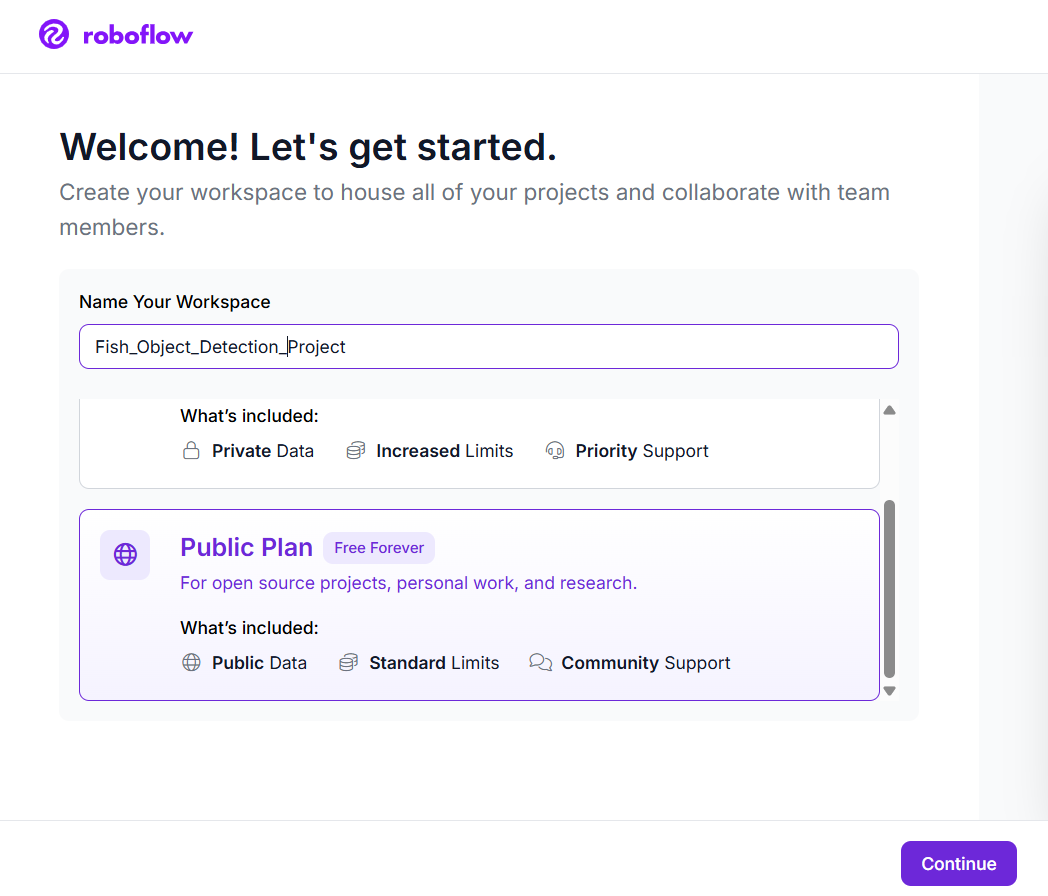

**Step 3: Get your API key**

1. After signing in, click your profile picture → Account Settings → API Key.

2. Copy the API Key — this is your secret token that lets Python or other tools access Roboflow.

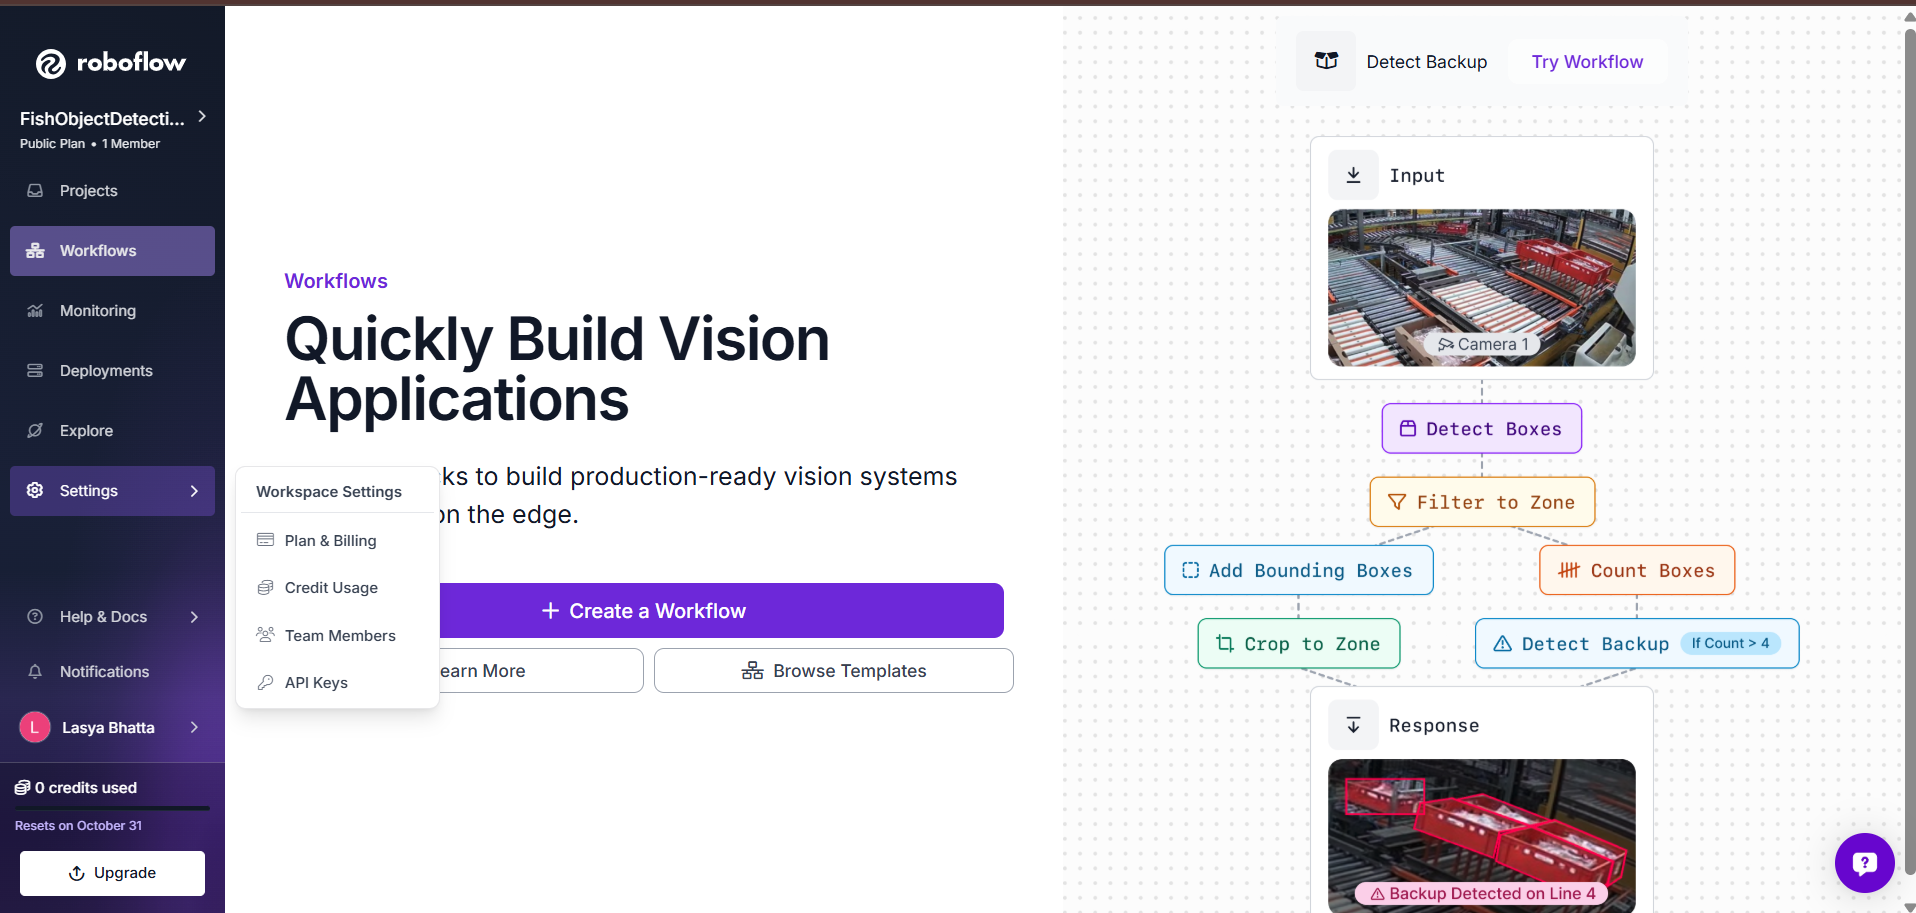

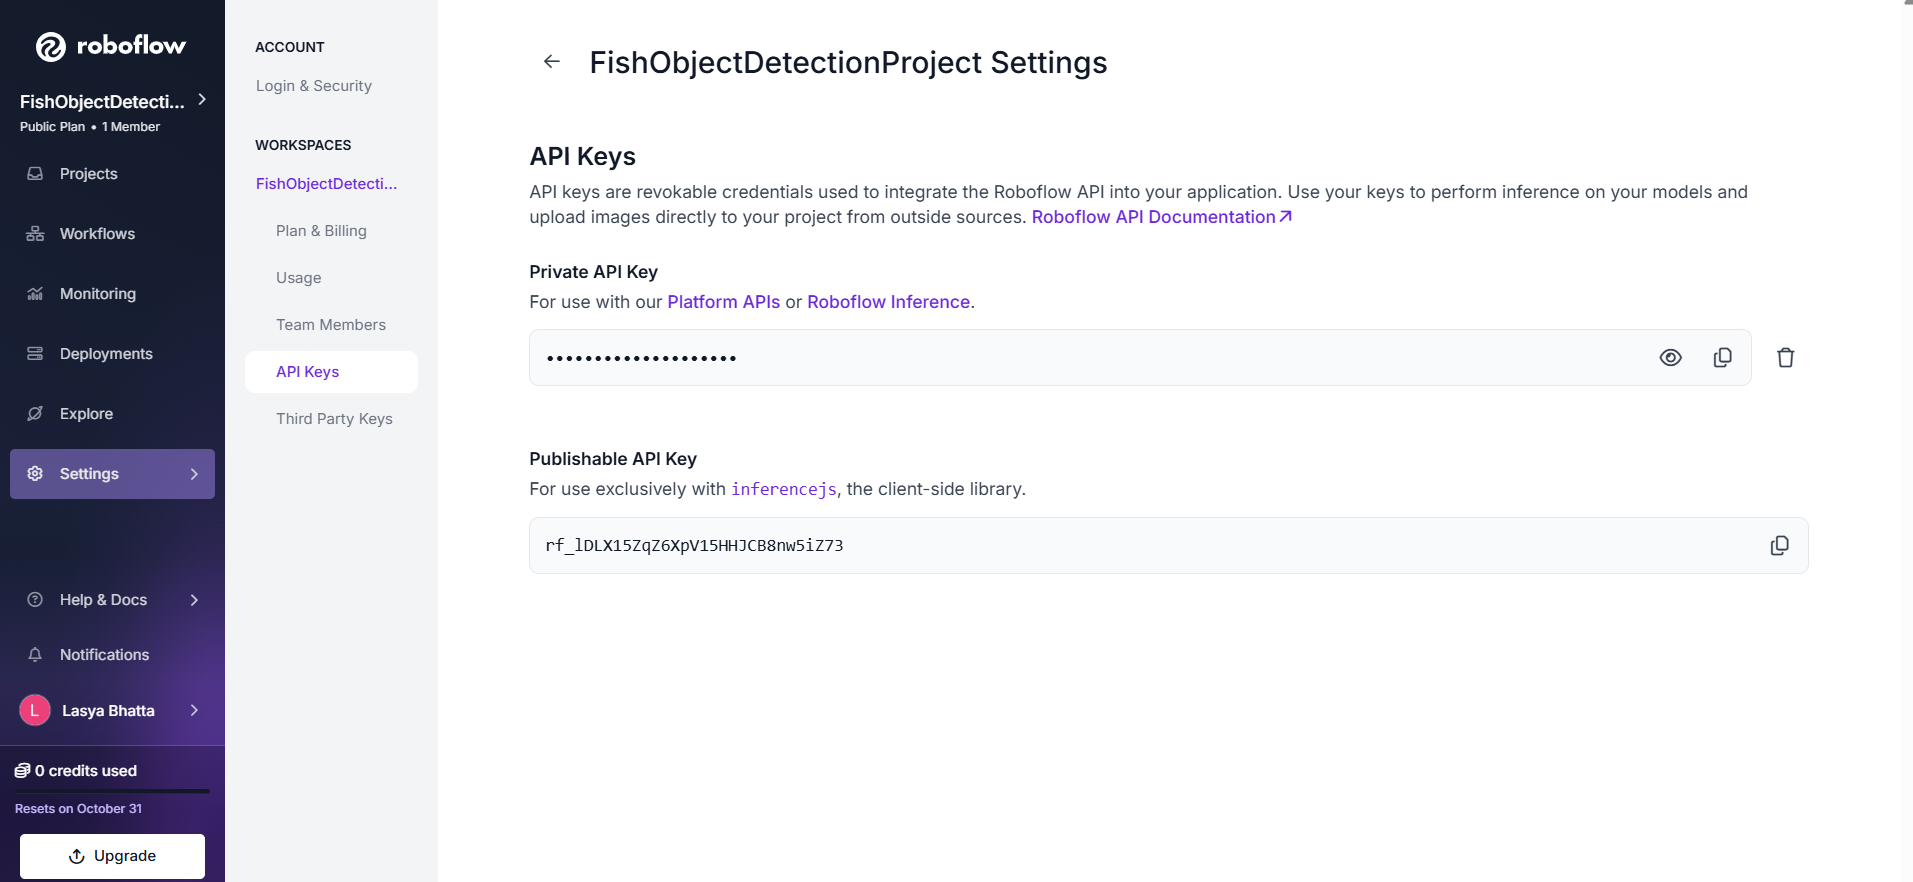

**Step 4: Choose a dataset / model** ( Start form here )

1. Go to Roboflow Public Datasets *(https://public.roboflow.com/)*

2. Under Universe search for “Aquarium combined computer vision model".

*Link : https://universe.roboflow.com/brad-dwyer/aquarium-combined*

3. Click on dataset.



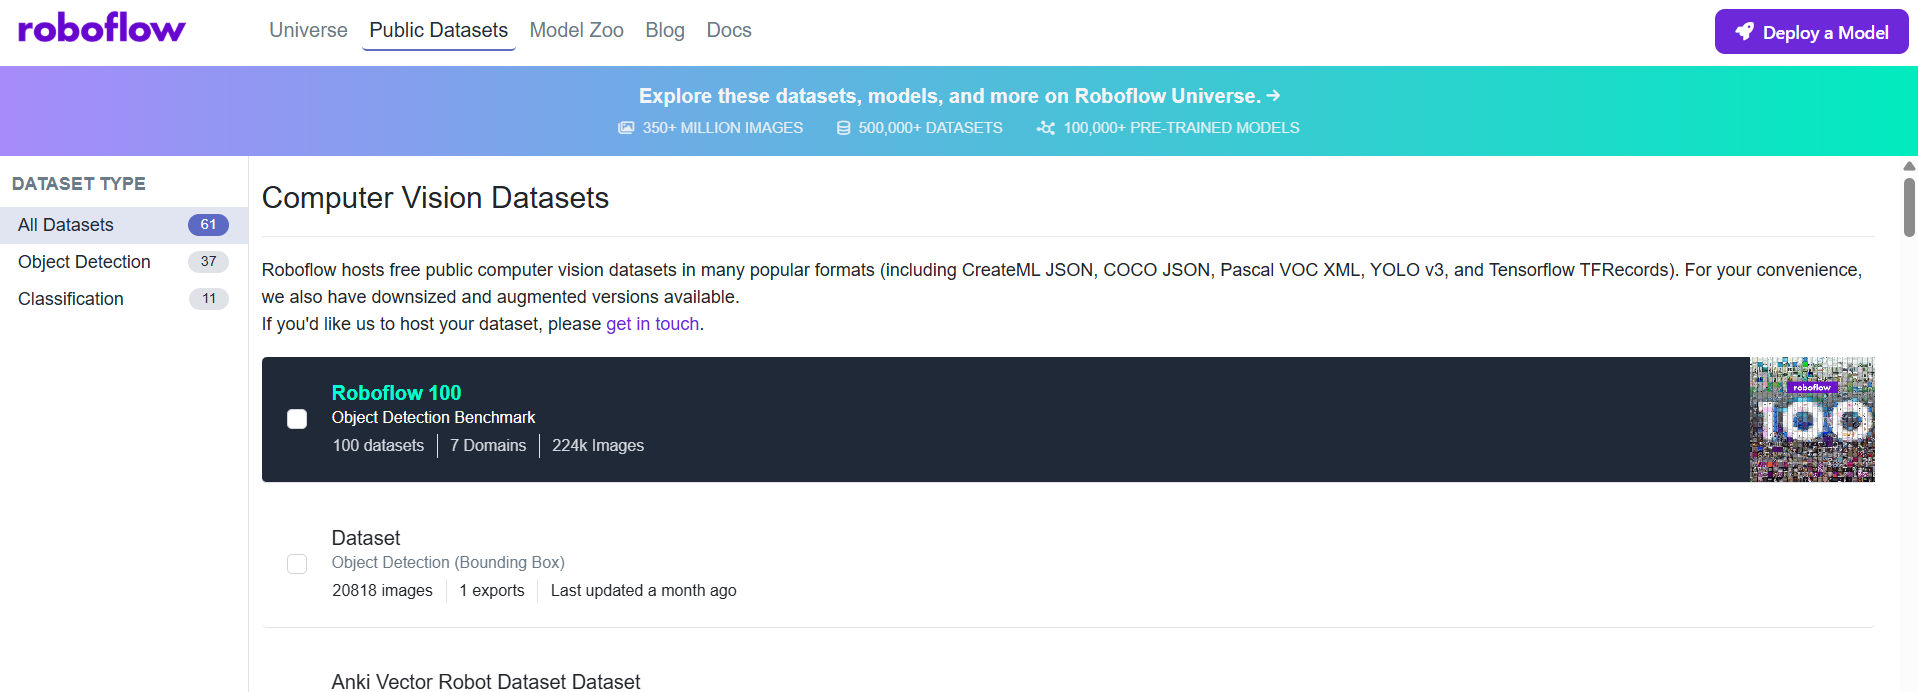

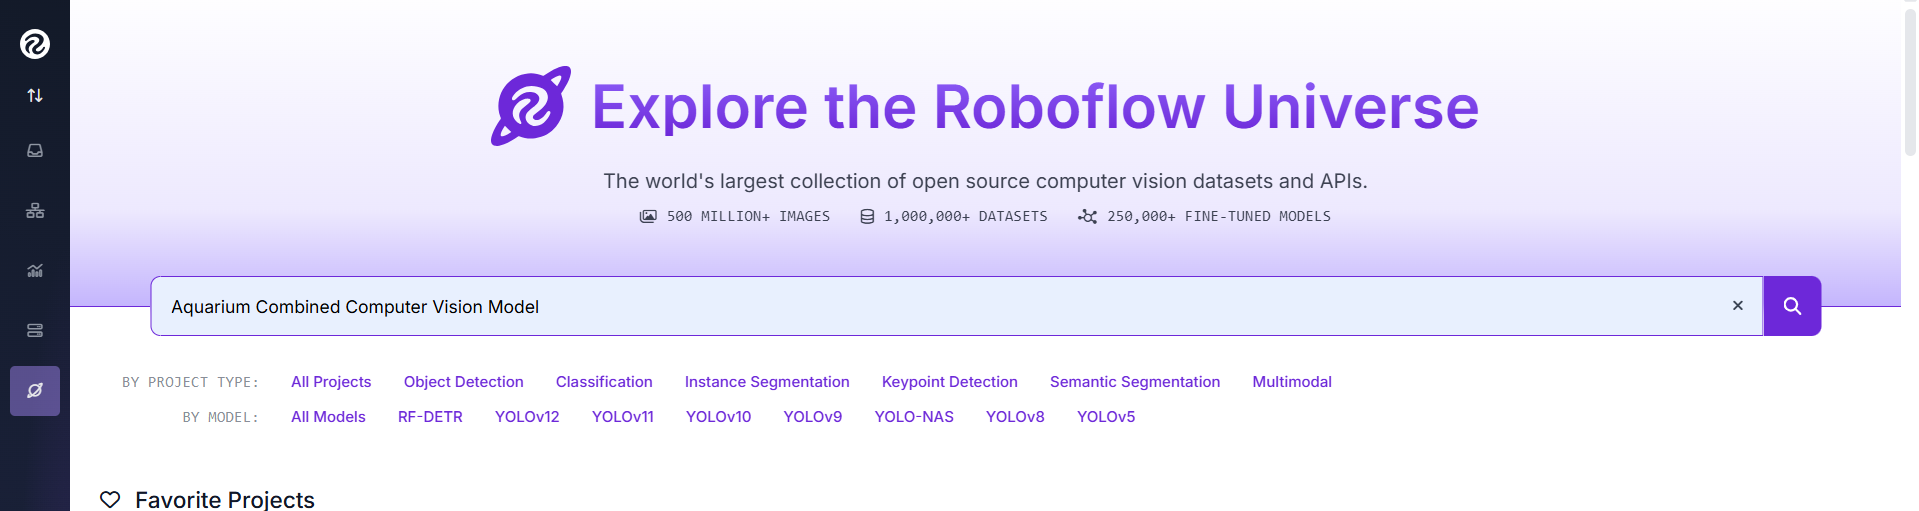

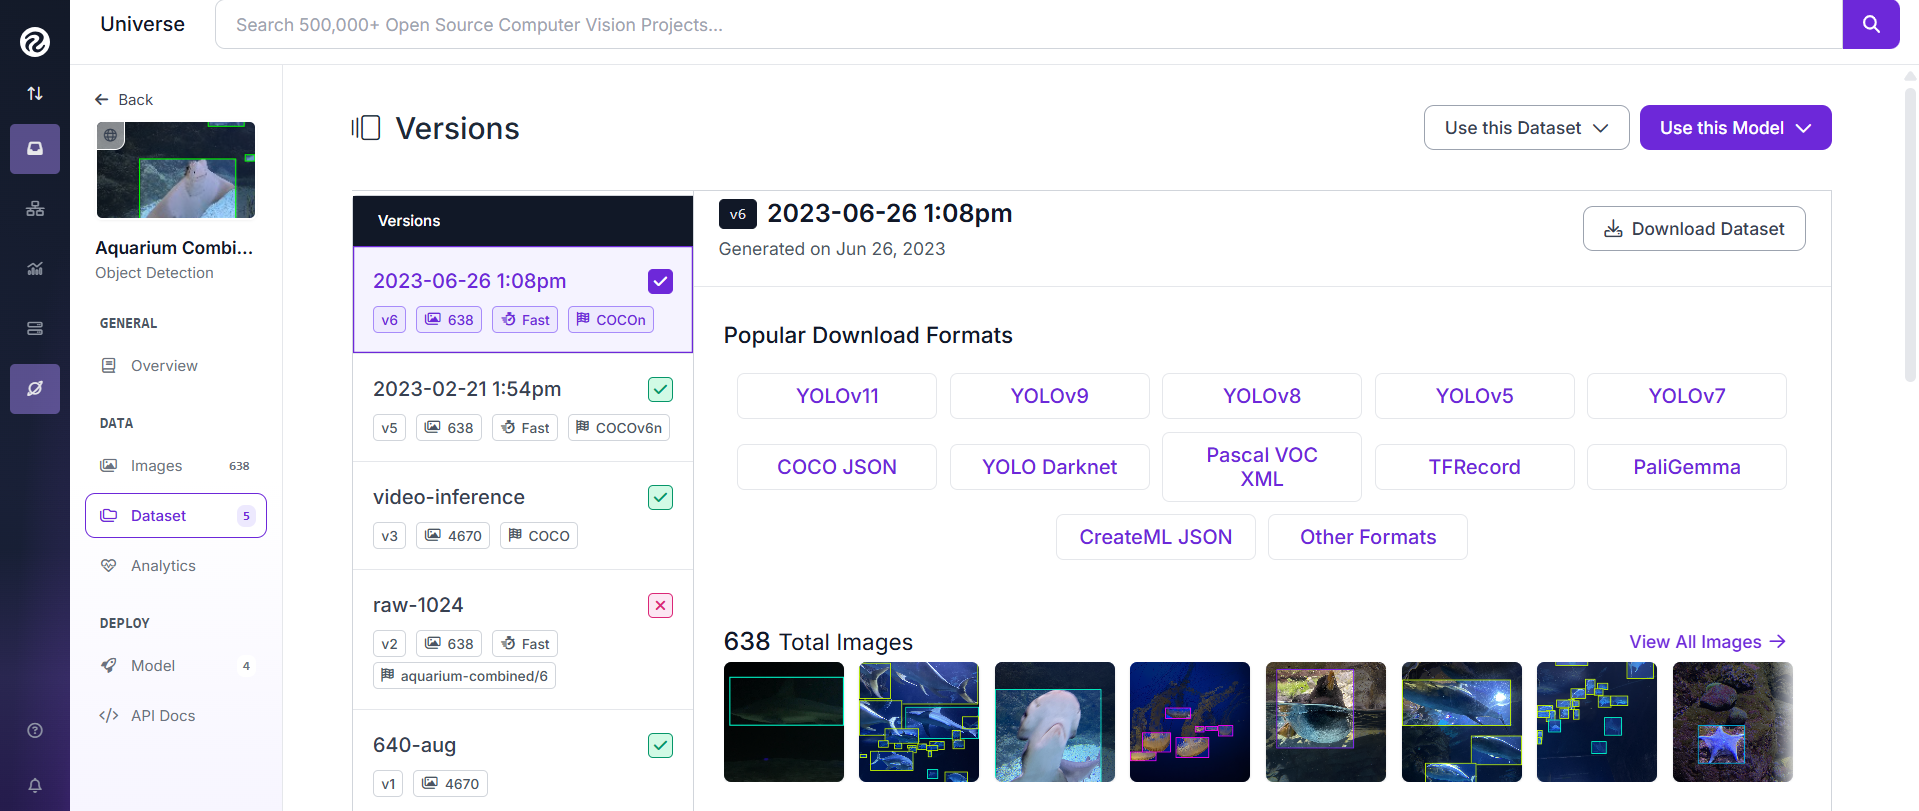

**Step 5 : Download the dataset**

1. Click on Download dataset (Get a code snippet or ZIP file ) and Continue.

2. Select YOLOv8 model — since in this session we will be using YOLOv8 for training and inference.

3. Click “Show download code” (This will give you Python code to train the model in Google Colab.) and click Continue.

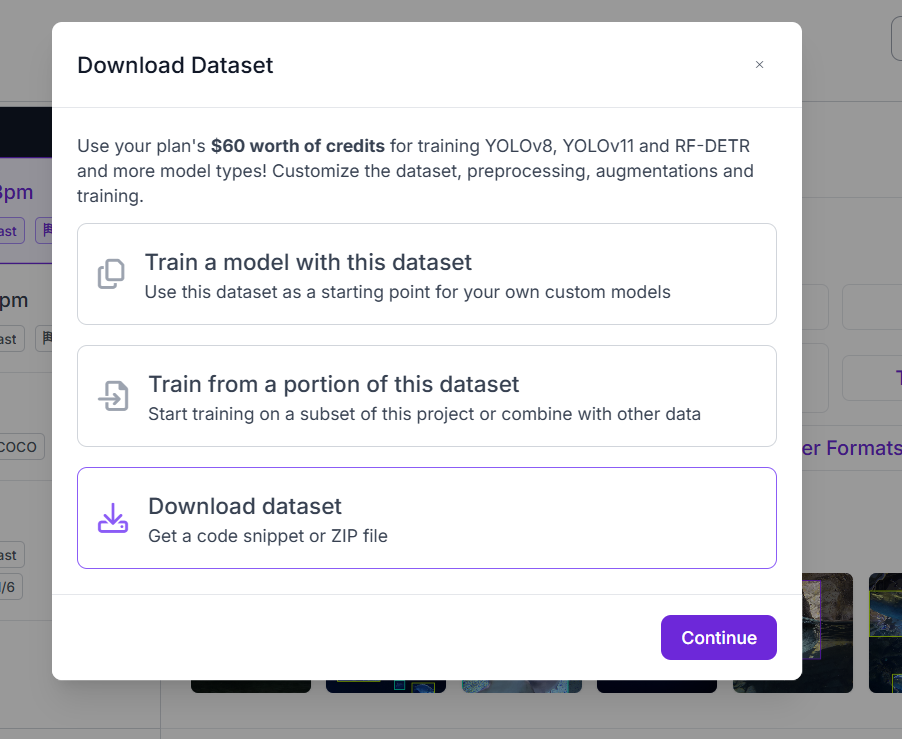

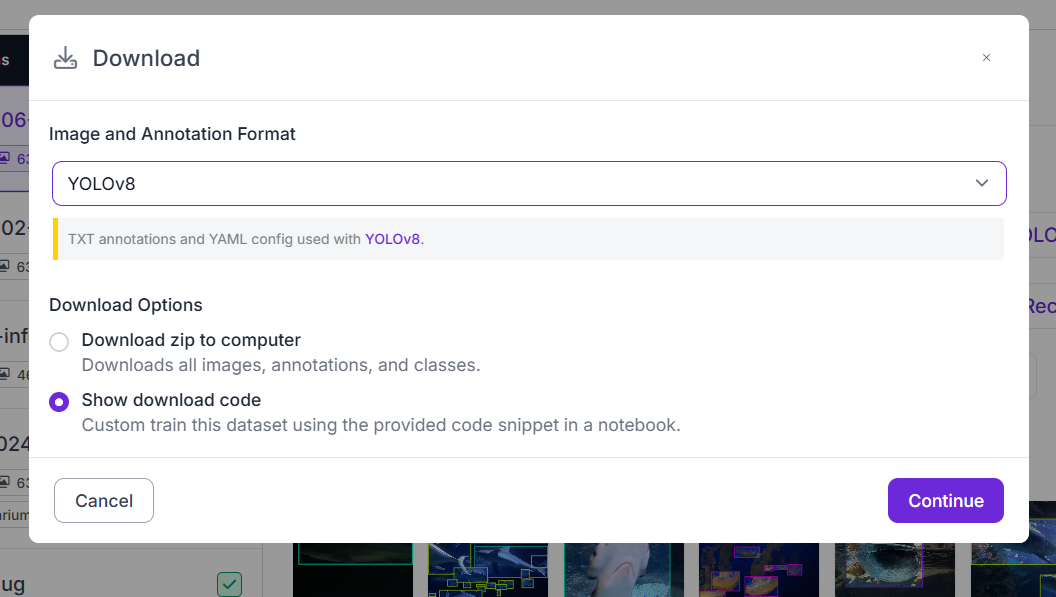

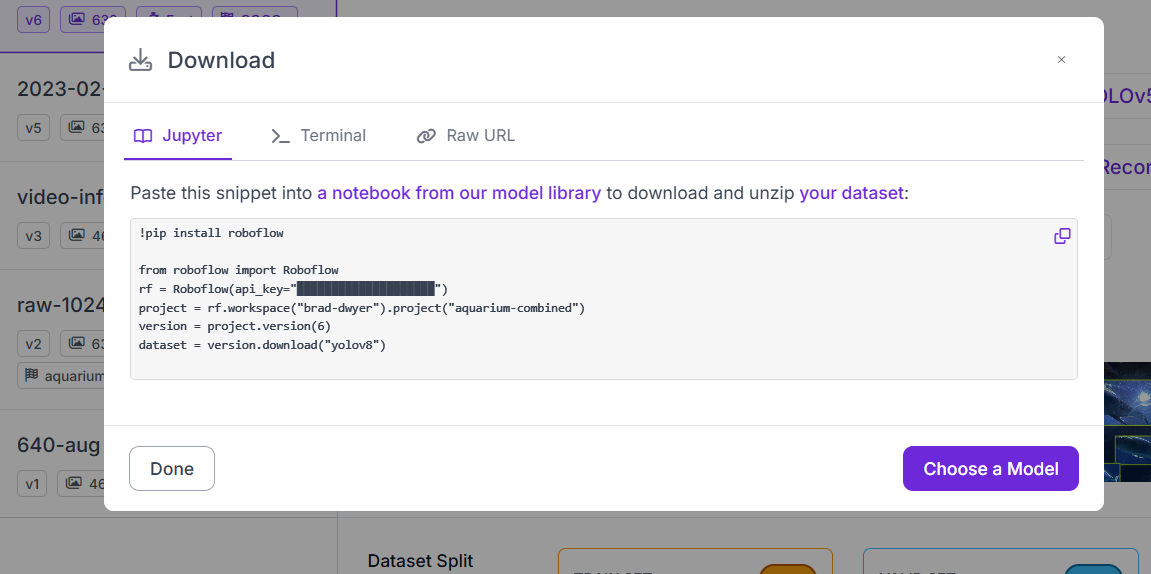

**Import Dataset: From Roboflow**

Store data into a specific directory

In [ ]:
%pwd

'/content'

In [ ]:
!mkdir FishDetctProject

mkdir: cannot create directory ‘FishDetctProject’: File exists


In [ ]:
!ls

FishDetctProject  sample_data


In [ ]:
import os
os.chdir("/content/FishDetctProject")

In [ ]:
%pwd

'/content/FishDetctProject'

In [ ]:
!pip install ultralytics


Note : Copy and paste the code from Roboflow. Do not worry the API key is automatically visible once you past.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="phyHk37gTkpto2WMu1nK")
project = rf.workspace("brad-dwyer").project("aquarium-combined")
version = project.version(6)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


**Step 4: Train the YOLO Model**

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model
model = YOLO("yolov8n.pt")

# Train it on your dataset
model.train(
    data="/content/FishDetctProject/Aquarium-Combined-6/data.yaml",  # path to your YAML
    epochs=20,       # adjust as needed
    imgsz=640,       # image size
    batch=16,        # batch size (adjust depending on RAM)
)


Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/FishDetctProject/Aquarium-Combined-6/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, persp

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b3228d6a450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [ ]:
!find /content -type f -name "results.csv"


/content/FishDetctProject/runs/detect/train5/results.csv
/content/FishDetctProject/runs/detect/train6/results.csv


During training, YOLO measures how well it’s doing:

Box loss: Are the boxes around the fish accurate?

Class loss: Did it get the type of fish right?

mAP / precision / recall: How often does YOLO succeed overall?

In [ ]:
# Evaluate trained model on validation/test data
metrics = model.val()


Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
val: Fast image access ✅ (ping: 0.1±0.0 ms, read: 87.1±94.2 MB/s, size: 397.2 KB)
val: Scanning /content/FishDetctProject/Aquarium-Combined-6/valid/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 127/127 11.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 0.2it/s 38.7s
                   all        127        909      0.686      0.679      0.712      0.436
                  fish         63        459      0.724      0.708      0.748      0.428
             jellyfish          9        155      0.654      0.916      0.911      0.513
               penguin         17        104      0.615      0.723      0.624       0.29
                puffin         15         74      0.711      0.432      0.516      0.251
                 shark         28         57      0.686      0.596      0.683      0.443
           

In [ ]:
# Load your detect CSV
metrics = pd.read_csv("/content/FishDetctProject/runs/detect/train6/results.csv")
print(metrics.columns)


Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


In [ ]:
# Show last row (final epoch)
final_metrics = metrics.iloc[-1]
print("Final Metrics:")
print(f"Precision: {final_metrics['metrics/precision(B)']:.3f}")
print(f"Recall: {final_metrics['metrics/recall(B)']:.3f}")
print(f"mAP@0.5: {final_metrics['metrics/mAP50(B)']:.3f}")
print(f"mAP@0.5-0.95: {final_metrics['metrics/mAP50-95(B)']:.3f}")

Final Metrics:
Precision: 0.679
Recall: 0.676
mAP@0.5: 0.712
mAP@0.5-0.95: 0.438


**Plotting Accuracy Metrics**

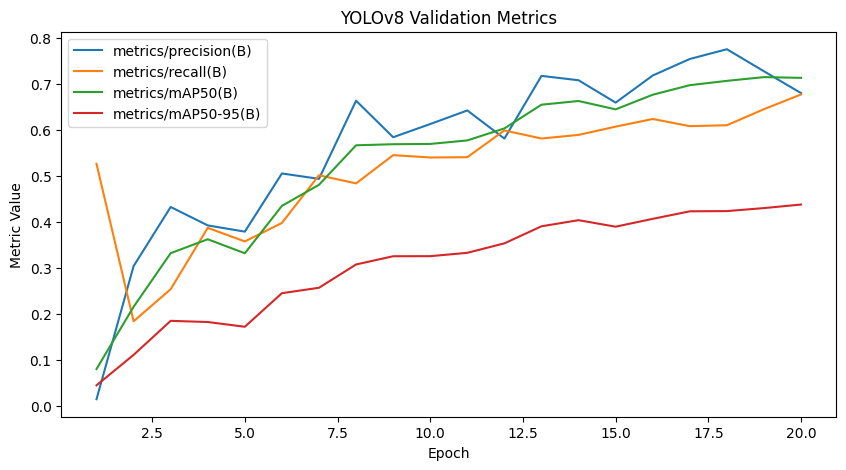

In [ ]:
# Use exact column names from your CSV
acc_cols = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']

plt.figure(figsize=(10,5))
for col in acc_cols:
    plt.plot(metrics["epoch"], metrics[col], label=col)

plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.title("YOLOv8 Validation Metrics")
plt.legend()
plt.show()


**Training Losses**

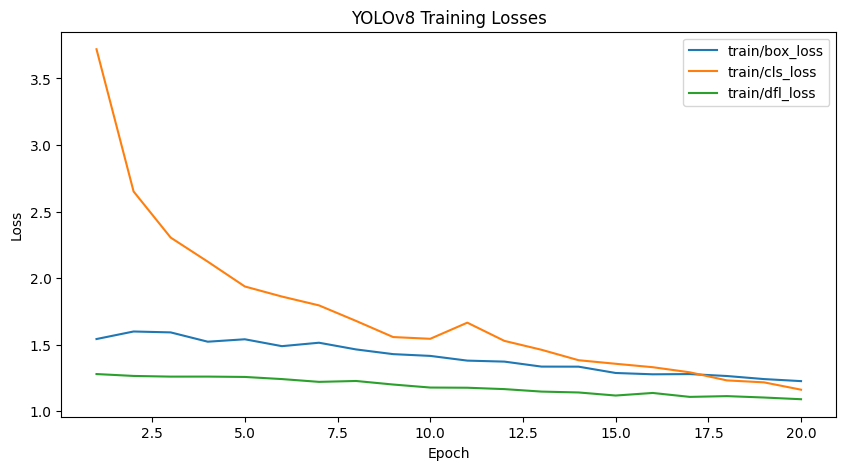

In [ ]:
# Columns for training loss
train_loss_cols = ['train/box_loss', 'train/cls_loss', 'train/dfl_loss']

plt.figure(figsize=(10,5))
for col in train_loss_cols:
    plt.plot(metrics["epoch"], metrics[col], label=col)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("YOLOv8 Training Losses")
plt.legend()
plt.show()

Test predictions on images

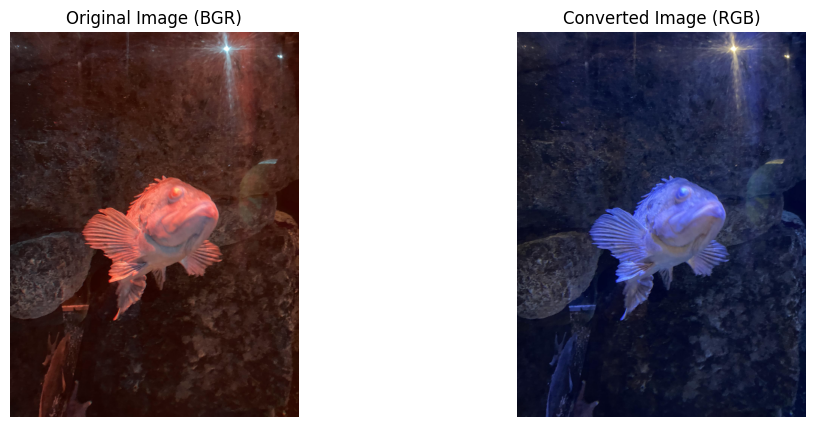

In [ ]:
import cv2
from matplotlib import pyplot as plt

test_image_path = '/content/FishDetctProject/Aquarium-Combined-6/test/images/IMG_2379_jpeg_jpg.rf.7dc7331bb2dfe884f129f3782bfb63c9.jpg'

# Read original image (BGR)
original_image = cv2.imread(test_image_path)

# Convert to RGB for matplotlib display
image_rgb = cv2.cvtColor(original_image.copy(), cv2.COLOR_BGR2RGB)

# Display original and RGB converted images side by side
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(original_image)  # BGR order, colors may look wrong in matplotlib
plt.title("Original Image (BGR)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image_rgb)       # Correct RGB colors
plt.title("Converted Image (RGB)")
plt.axis('off')

plt.show()


In [ ]:
results = model.predict(source=test_image_path, save=False, show=False)



image 1/1 /content/FishDetctProject/Aquarium-Combined-6/test/images/IMG_2379_jpeg_jpg.rf.7dc7331bb2dfe884f129f3782bfb63c9.jpg: 640x480 1 fish, 230.0ms
Speed: 5.1ms preprocess, 230.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


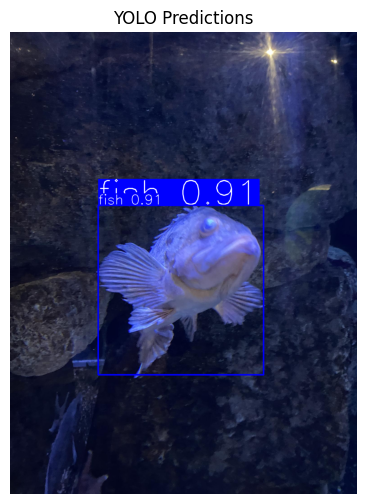

In [ ]:
# Draw predictions with padding to avoid overlap
box_thickness = 4
font_scale = 2
font_thickness = 2
# padding = 5  # space between text and box

for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()
    confidences = result.boxes.conf.cpu().numpy()
    class_ids = result.boxes.cls.cpu().numpy()
    names = model.names

    for box, conf, cls_id in zip(boxes, confidences, class_ids):
        x1, y1, x2, y2 = map(int, box)
        label = f"{names[int(cls_id)]} {conf:.2f}"

        # Draw bounding box
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 0, 255), thickness=box_thickness)

        # Compute text size
        (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)

        # Ensure text is inside image
        text_x1 = x1
        text_y1 = max(y1 - text_height - padding, 0)  # don’t go above image
        text_x2 = x1 + text_width
        text_y2 = y1

        # Draw filled rectangle behind text
        cv2.rectangle(image_rgb, (text_x1, text_y1), (text_x2, text_y2), (0, 0, 255), -1)

        # Put label text
        cv2.putText(image_rgb, label, (text_x1, text_y2 - padding), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness)

# Display prediction
plt.figure(figsize=(10,6))
plt.imshow(image_rgb)
plt.title("YOLO Predictions")
plt.axis('off')
plt.show()